# Problem statement: 


To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data

Necessary actions to read the data

1. Data Reading/Data Understanding
   - Defining the path for train and test images 

2. Dataset Creation:
   - Create train & validation dataset from the train directory with a batch size of 32. Also, make sure you resize your images to 180*180.

3. Dataset visualisation
   - Create a code to visualize one instance of all the nine classes present in the dataset
  
4. Building & training Model V1: 
- Create a CNN model, which can accurately detect 9 classes present in the dataset. While building the model, rescale images to normalize pixel values between (0,1).
  - Choose an appropriate optimiser and loss function for model training
  - Train the model for ~20 epochs
  - Write your findings after the model fit. You must check if there is any evidence of model overfit or underfit.
  - Chose an appropriate data augmentation strategy to resolve underfitting/overfitting 

1. Building & training Model V2 on the augmented data :
   - Create a CNN model, which can accurately detect 9 classes present in the dataset. While building the model rescale images to normalize pixel values between (0,1).
   - Choose an appropriate optimiser and loss function for model training
   - Train the model for ~20 epochs
   - Write your findings after the model fit, see if the earlier issue is resolved or not?

2. Class distribution: Examine the current class distribution in the training dataset 
   - Which class has the least number of samples?
   - Which classes dominate the data in terms of the proportionate number of samples?


7. Handling class imbalances: 
   - Rectify class imbalances present in the training dataset with Augmentor library.

8. Building & training Model V3 on the rectified class imbalance data:
   - Create a CNN model, which can accurately detect 9 classes present in the dataset. While building the model, rescale images to normalize pixel values between (0,1).
   - Choose an appropriate optimiser and loss function for model training
   - Train the model for ~30 epochs
  
9. Write findings after the model fit, see if the issues are resolved or not?

### Importing all the important libraries

In [57]:
import os
import PIL
import pathlib
import seaborn as sns

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import keras
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

## Data Reading/Data Understanding
→ Defining the path for train and test images

In [3]:
data_dir = "data"
data_dir

'data'

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [4]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path(f"{data_dir}/Train")
data_dir_test = pathlib.Path(f"{data_dir}/Test")

data_dir_train

PosixPath('data/Train')

In [5]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


#Dataset Creation
Create train & validation dataset from the train directory with a batch size of 32.
Also, make sure you resize your images to 180*180

### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [6]:
seed = 123
batch_size = 32
img_height = 180
img_width = 180
validation_split = 0.2

Use 80% of the images for training, and 20% for validation.

In [7]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

train_ds = keras.utils.image_dataset_from_directory(
    data_dir_train,
    seed=seed,
    shuffle=True,
    subset="training",
    label_mode="categorical",
    batch_size=batch_size,
    image_size=(img_height, img_width),
    validation_split=validation_split,
)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


2024-03-12 10:51:46.845621: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-03-12 10:51:46.845651: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-03-12 10:51:46.845659: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-03-12 10:51:46.845694: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-12 10:51:46.845710: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [8]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = keras.utils.image_dataset_from_directory(
    data_dir_train,
    seed=seed,
    shuffle=True,
    subset="validation",
    label_mode="categorical",
    batch_size=batch_size,
    image_size=(img_height, img_width),
    validation_split=validation_split,
)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [9]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

32


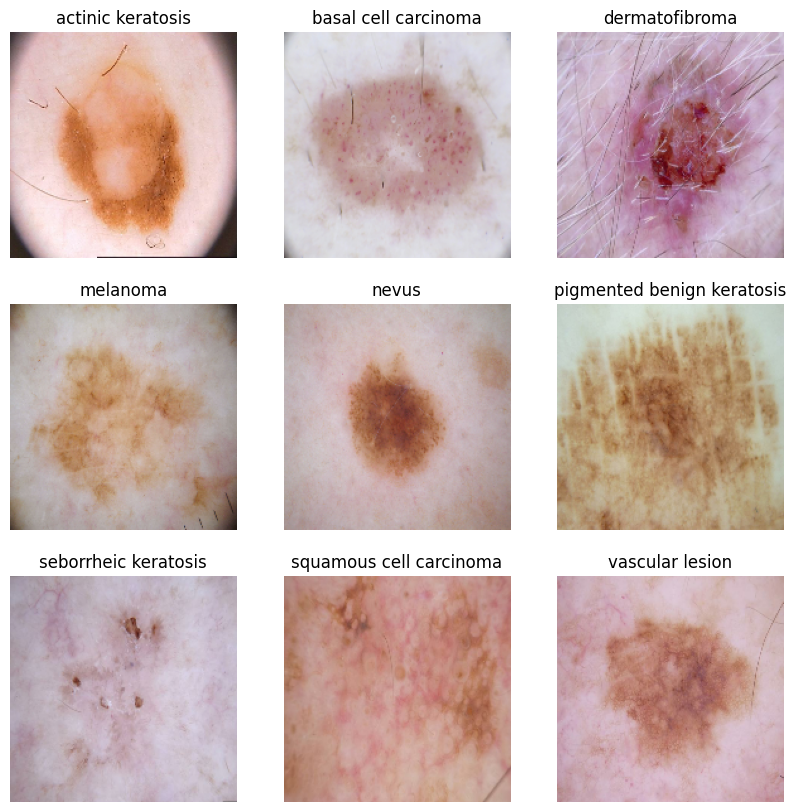

In [14]:
import matplotlib.pyplot as plt

### To visualize the images
fig, axs = plt.subplots(3, 3, figsize=(10, 10))

for images, labels in train_ds.take(1):
  print(len(images))
  for i in range(len(train_ds.class_names)):
    # Display the image
    axs[i // 3, i % 3].imshow(images[i].numpy().astype("uint8"))
    axs[i // 3, i % 3].set_title(train_ds.class_names[i])
    axs[i // 3, i % 3].axis('off')

# Plotting the images
plt.show()
fig.savefig('./img/categories.jpg')

In [16]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model

In [17]:
### Your code goes here
# Create the model
model = keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_height, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(9, activation='softmax')
])

### Compile the model
Choose an appropirate optimiser and loss function for model training

In [18]:
# Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='Adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 118336)            0

### Train the model

In [19]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=20
)

Epoch 1/20


2024-03-12 10:57:18.793943: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


169/169 [==============================] - 17s 53ms/step - loss: 3.3676 - accuracy: 0.2224 - val_loss: 2.0421 - val_accuracy: 0.3118
Epoch 2/20
169/169 [==============================] - 7s 42ms/step - loss: 1.7931 - accuracy: 0.3616 - val_loss: 1.7339 - val_accuracy: 0.3786
Epoch 3/20
169/169 [==============================] - 7s 39ms/step - loss: 1.6755 - accuracy: 0.3930 - val_loss: 1.8804 - val_accuracy: 0.3972
Epoch 4/20
169/169 [==============================] - 7s 39ms/step - loss: 1.7701 - accuracy: 0.4010 - val_loss: 1.5569 - val_accuracy: 0.4328
Epoch 5/20
169/169 [==============================] - 7s 39ms/step - loss: 1.9717 - accuracy: 0.3795 - val_loss: 1.9454 - val_accuracy: 0.3029
Epoch 6/20
169/169 [==============================] - 7s 42ms/step - loss: 2.0459 - accuracy: 0.3846 - val_loss: 1.7563 - val_accuracy: 0.3712
Epoch 7/20
169/169 [==============================] - 7s 39ms/step - loss: 1.9175 - accuracy: 0.4039 - val_loss: 3.5113 - val_accuracy: 0.2866
Epoch 8/2

### Visualizing training results

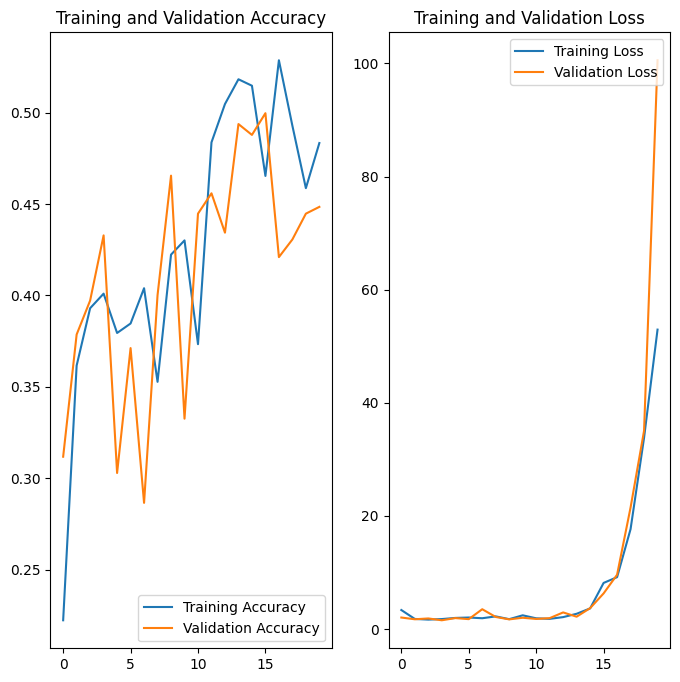

<Figure size 640x480 with 0 Axes>

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

plt.savefig("./img/model_v1.png")

### Insight

Overfitting:

  - The training loss decreases rapidly at first, but then starts to increase again.
  - The validation loss decreases at first, but then starts to increase again and becomes higher than the training loss.
  - The accuracy on the training set is much higher than the accuracy on the validation set.

Underfitting:

  - The training loss decreases slowly and does not reach a very low value.
  - The validation loss is high and does not decrease much during training.
  - The accuracy on both the training and validation sets is low.

Here are some specific metrics you can look at:

  - Training and validation loss: Plot the training and validation loss curves over the epochs. If the validation loss is significantly higher than the training loss, it could indicate overfitting.
  - Training and validation accuracy: Plot the training and validation accuracy curves over the epochs. If the training accuracy is much higher than the validation accuracy, it could indicate overfitting.
  - Gap between training and validation loss/accuracy: Calculate the difference between the training and validation loss/accuracy at the end of training. A large gap could indicate overfitting or underfitting.

### How to resolve problem 
- Overfitting:
  - Use dropout or other regularization techniques.
  - Reduce the number of trainable parameters in your model.
  - Collect more training data.

- Underfitting:
  - Train the model for more epochs.
  - Use a more complex model architecture.
  - Collect more training data.

## Model V2
Image augmentation is a technique of applying different transformations to original images which results in multiple transformed copies of the same image. Each copy, however, is different from the other in certain aspects depending on the augmentation techniques you apply like shifting, rotating, flipping, etc.

In [49]:
image_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,
    rotation_range=10,
    zoom_range=0.05,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.05,
    validation_split=0.20,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.2, 1.2],
)


train_generator = image_datagen.flow_from_directory(
    directory=data_dir_train,
    target_size=(img_height, img_width),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    subset='training',
    seed=seed
)


val_generator = image_datagen.flow_from_directory(
    directory=data_dir_train,
    target_size=(img_height, img_width),
    color_mode="rgb",
    batch_size=batch_size,
    subset='validation',
    class_mode="categorical",
    seed=seed
)

Found 5395 images belonging to 9 classes.
Found 1344 images belonging to 9 classes.


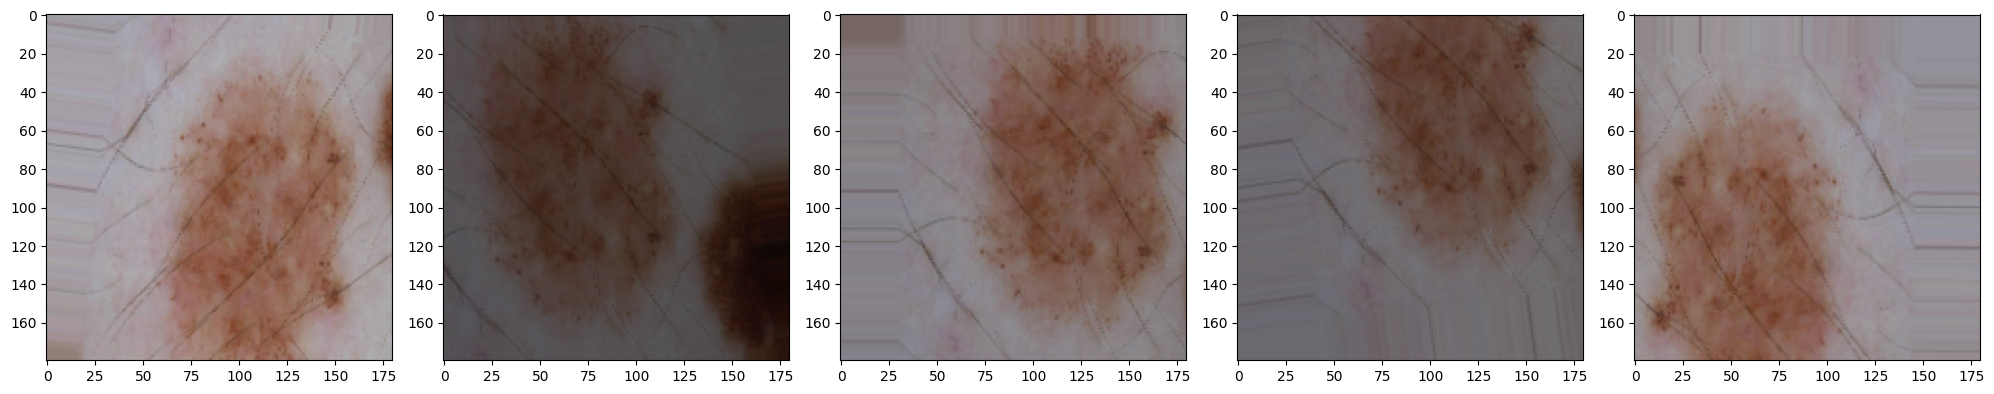

In [50]:
# def plotImages(images_arr):
fig, axes = plt.subplots(1, 5, figsize=(20,20))
axes = axes.flatten()
for img, ax in zip( [train_generator[0][0][0] for i in range(5)], axes):
    ax.imshow(img)
plt.tight_layout()
plt.show()


### Create the model, compile and train the model

In [51]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
model_v2 = keras.Sequential([
        
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_height, 3)),

    layers.Conv2D(32, (3, 3), padding='same'),
    layers.Activation("relu"),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), padding='same'),
    layers.Activation("relu"),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), padding='same'),
    layers.Activation("relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.25),
    layers.BatchNormalization(),
    
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.25),
    layers.BatchNormalization(),

    layers.Dense(9, activation='softmax')


])

### Compiling the model

In [52]:
## Your code goes here
model_v2.compile(optimizer='Adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

model_v2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_7 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_20 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 activation_18 (Activation)  (None, 180, 180, 32)      0         
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 90, 90, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 90, 90, 64)        18496     
                                                                 
 activation_19 (Activation)  (None, 90, 90, 64)        0         
                                                      

### Training the model

In [53]:
history = model_v2.fit(
  train_generator,
  validation_data=val_generator,
  epochs=20,
  verbose=1
)

Epoch 1/20
169/169 [==============================] - 60s 350ms/step - loss: 2.3732 - accuracy: 0.1147 - val_loss: 2.2907 - val_accuracy: 0.0945
Epoch 2/20
169/169 [==============================] - 63s 372ms/step - loss: 2.2412 - accuracy: 0.1283 - val_loss: 2.4966 - val_accuracy: 0.1391
Epoch 3/20
169/169 [==============================] - 61s 358ms/step - loss: 2.1702 - accuracy: 0.1698 - val_loss: 8.6648 - val_accuracy: 0.1391
Epoch 4/20
169/169 [==============================] - 60s 356ms/step - loss: 2.0323 - accuracy: 0.2083 - val_loss: 4.2851 - val_accuracy: 0.1399
Epoch 5/20
169/169 [==============================] - 61s 361ms/step - loss: 1.9755 - accuracy: 0.2258 - val_loss: 13.4467 - val_accuracy: 0.1391
Epoch 6/20
169/169 [==============================] - 59s 351ms/step - loss: 2.3065 - accuracy: 0.1234 - val_loss: 9.3246 - val_accuracy: 0.0856
Epoch 7/20
169/169 [==============================] - 59s 352ms/step - loss: 2.2377 - accuracy: 0.1305 - val_loss: 6.5052 - val_a

### Visualizing the results

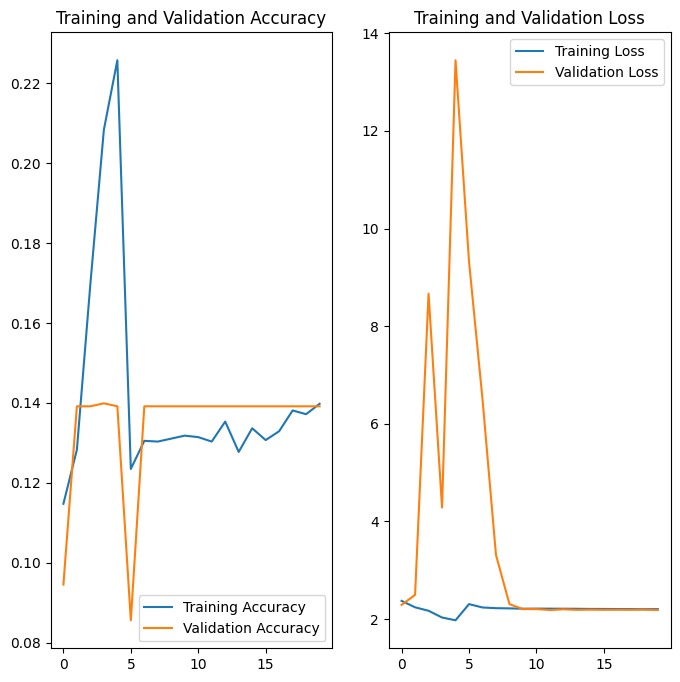

In [54]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Insight
Using Image generator and increase the complexity of model, the performance does not improve significantly.
In multiple classification we can check the balance of dataset 

### The distribution of classes in the training dataset.


#### **Context:** 
Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [58]:
## Your code goes here.

#count number of image in each classes
count= []
for path in pathlib.Path(data_dir_train).iterdir():
    if path.is_dir():
        count.append(len([name for name in os.listdir(path)
                            if os.path.isfile(os.path.join(path, name))]))

#name of the classes
sub_directory = [name for name in os.listdir(data_dir_train)
                if os.path.isdir(os.path.join(data_dir_train, name))]

#return dataframe with image count and class.
original_df = pd.DataFrame(list(zip(sub_directory,count)),columns =['Label', 'No. of Image'])


<Axes: xlabel='No. of Image', ylabel='Label'>

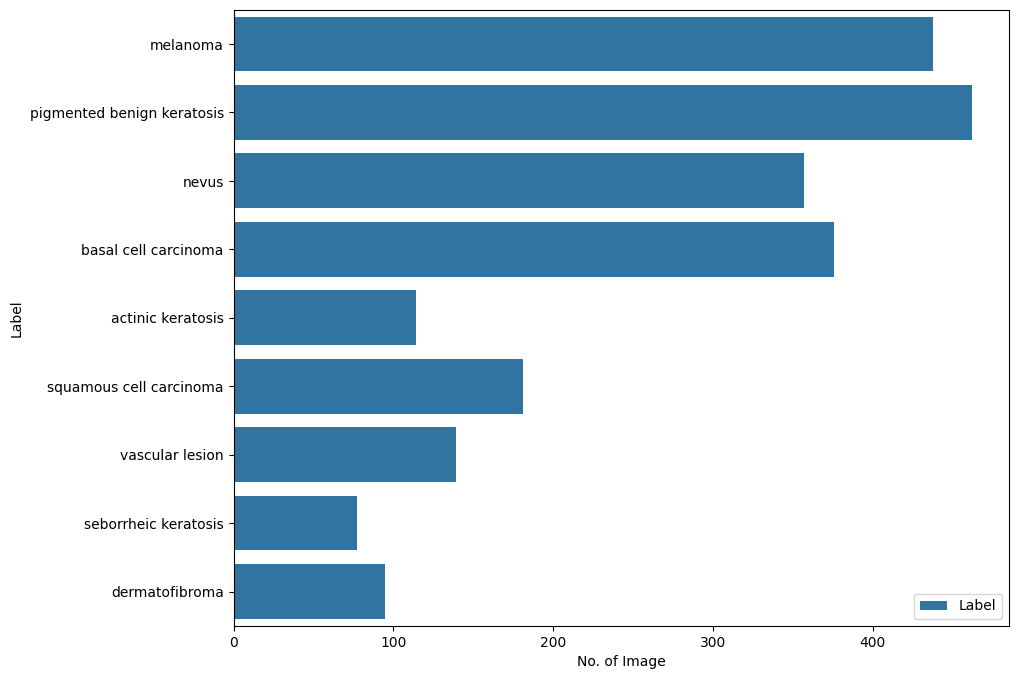

In [59]:
plt.figure(figsize=(10, 8))
sns.barplot(x="No. of Image", y="Label", data=original_df,
            label="Label")

#### - The classes dominate the data in terms proportionate number of samples are: 
        - melanoma
        - pigmented benign keratosis
        - nevus
        - basal cell carcinoma
#### - The classes has the least number of samples are: 
        - actinic keratosis
        - squamous cell carcinoma
        - vascular lesion
        - seborrheic keratosis
        - dermatofibroma

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [60]:
path_to_training_dataset=data_dir_train
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset.joinpath(i))
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to data/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x355F56FD0>: 100%|██████████| 500/500 [00:01<00:00, 394.89 Samples/s]                  


Initialised with 376 image(s) found.
Output directory set to data/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x35E1FE670>: 100%|██████████| 500/500 [00:01<00:00, 404.60 Samples/s]                  


Initialised with 95 image(s) found.
Output directory set to data/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x17A3A6FD0>: 100%|██████████| 500/500 [00:01<00:00, 367.32 Samples/s]


Initialised with 438 image(s) found.
Output directory set to data/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=3872x2592 at 0x3D8E735B0>: 100%|██████████| 500/500 [00:06<00:00, 83.03 Samples/s]                   


Initialised with 357 image(s) found.
Output directory set to data/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=959x639 at 0x17D5E22B0>: 100%|██████████| 500/500 [00:06<00:00, 81.35 Samples/s]                     


Initialised with 462 image(s) found.
Output directory set to data/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x3578375E0>: 100%|██████████| 500/500 [00:01<00:00, 385.89 Samples/s]                  


Initialised with 77 image(s) found.
Output directory set to data/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x4743E1940>: 100%|██████████| 500/500 [00:02<00:00, 179.89 Samples/s]


Initialised with 181 image(s) found.
Output directory set to data/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x3D8E77220>: 100%|██████████| 500/500 [00:01<00:00, 389.35 Samples/s]                  


Initialised with 139 image(s) found.
Output directory set to data/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x495EF7D00>: 100%|██████████| 500/500 [00:01<00:00, 386.58 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [61]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

9000


### Lets see the distribution of augmented data after adding new images to the original training data.

In [62]:
path_list_new = [x for x in data_dir_train.glob(os.path.join( '*','output', '*.jpg'))]

In [63]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in data_dir_train.glob(os.path.join('*','output', '*.jpg'))]

In [64]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

<Axes: xlabel='No. of Image', ylabel='Label'>

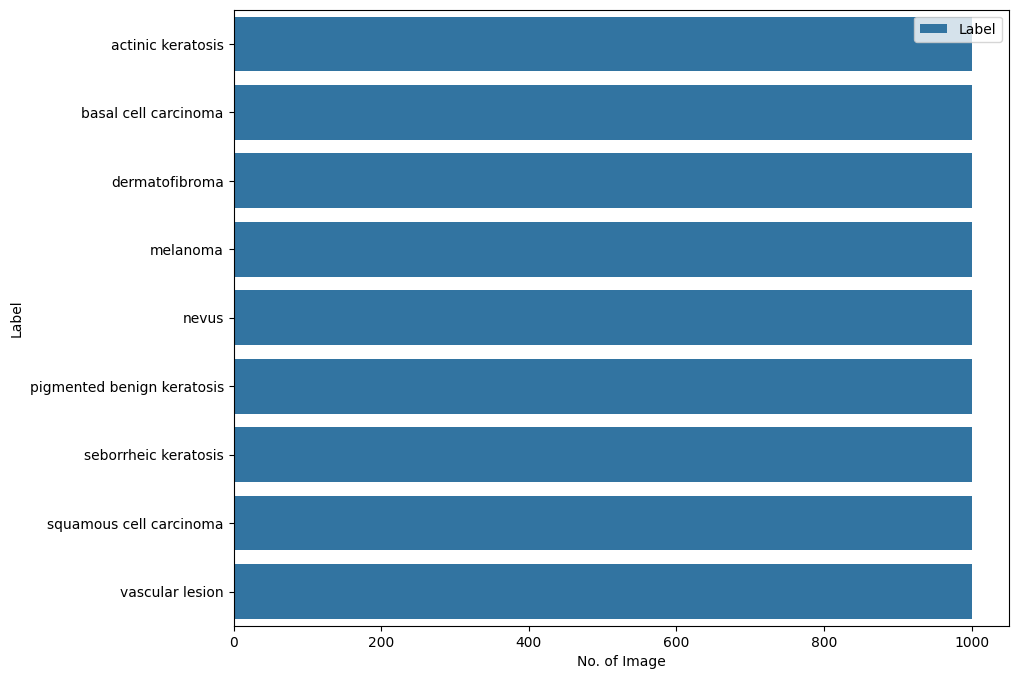

In [65]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])

df2 = df2.groupby(["Label"]).count().reset_index().rename(columns={"Path": "No. of Image"})


# Visualize input data
plt.figure(figsize=(10, 8))
sns.barplot(x="No. of Image", y="Label", data=df2,
            label="Label")

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### Train the model on the data created using Augmentor

<Axes: xlabel='No. of Image', ylabel='Label'>

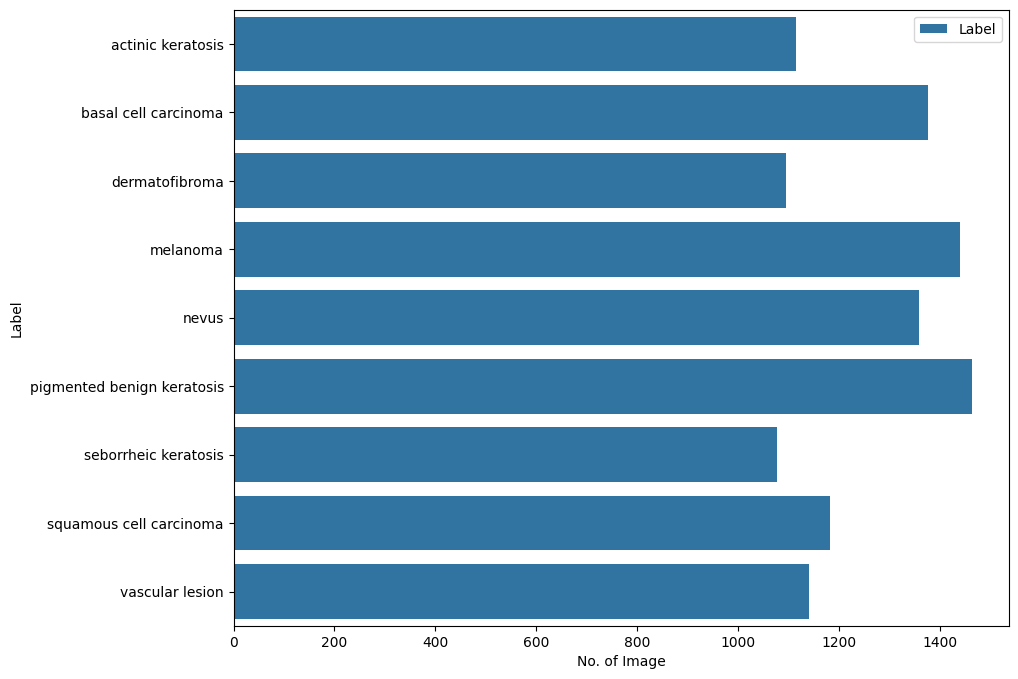

In [66]:
new_df = pd.concat([original_df, df2])
new_df = new_df.groupby(["Label"]).sum().reset_index()

# Visualize input data
plt.figure(figsize=(10, 8))
sns.barplot(x="No. of Image", y="Label", data=new_df,
            label="Label")

#### Create a training dataset

In [67]:
data_dir_train=data_dir_train
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=seed,
  batch_size=batch_size,
  image_size=(img_height, img_width),
  validation_split=validation_split,
  subset="training",
  label_mode='categorical'
  )


Found 11239 files belonging to 9 classes.
Using 8992 files for training.


#### Create a validation dataset

In [68]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  batch_size=batch_size,
  image_size=(img_height, img_width),
  seed=seed,
  validation_split=validation_split,
  subset="validation",
  label_mode='categorical'
  )

Found 11239 files belonging to 9 classes.
Using 2247 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [69]:
## your code goes here
model_v3 = keras.Sequential([
    
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_height, 3)),

    layers.Conv2D(32, (3, 3), padding='same'),
    layers.Activation("relu"),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), padding='same'),
    layers.Activation("relu"),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), padding='same'),
    layers.Activation("relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.25),
    layers.BatchNormalization(),
    
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.25),
    layers.BatchNormalization(),

    layers.Dense(9, activation='softmax')
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [70]:
## your code goes here
model_v3.compile(optimizer='Adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

model_v3.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_8 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_23 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 activation_21 (Activation)  (None, 180, 180, 32)      0         
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 90, 90, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_24 (Conv2D)          (None, 90, 90, 64)        18496     
                                                                 
 activation_22 (Activation)  (None, 90, 90, 64)        0         
                                                      

#### Train your model

I trained and tunned many times with the epoc = 30 we cannot increase accuracy over 70%
So I decided increase epoch to 40

In [71]:
## Your code goes here, use 50 epochs.
history = model_v3.fit(
  train_ds,
  validation_data=val_ds,
  epochs=30,
  verbose=1
)

Epoch 1/30


281/281 [==============================] - 24s 79ms/step - loss: 1.8947 - accuracy: 0.2924 - val_loss: 2.8218 - val_accuracy: 0.3436
Epoch 2/30
281/281 [==============================] - 21s 75ms/step - loss: 1.4953 - accuracy: 0.4356 - val_loss: 1.4461 - val_accuracy: 0.4588
Epoch 3/30
281/281 [==============================] - 21s 75ms/step - loss: 1.3534 - accuracy: 0.4924 - val_loss: 1.2880 - val_accuracy: 0.5296
Epoch 4/30
281/281 [==============================] - 21s 75ms/step - loss: 1.2639 - accuracy: 0.5335 - val_loss: 1.2485 - val_accuracy: 0.5683
Epoch 5/30
281/281 [==============================] - 22s 76ms/step - loss: 1.2030 - accuracy: 0.5633 - val_loss: 1.2137 - val_accuracy: 0.5705
Epoch 6/30
281/281 [==============================] - 22s 76ms/step - loss: 1.1445 - accuracy: 0.5849 - val_loss: 1.1146 - val_accuracy: 0.5941
Epoch 7/30
281/281 [==============================] - 22s 76ms/step - loss: 1.1046 - accuracy: 0.6058 - val_loss: 1.0440 - val_accuracy: 0.6506
Epo

#### Visualize the model results

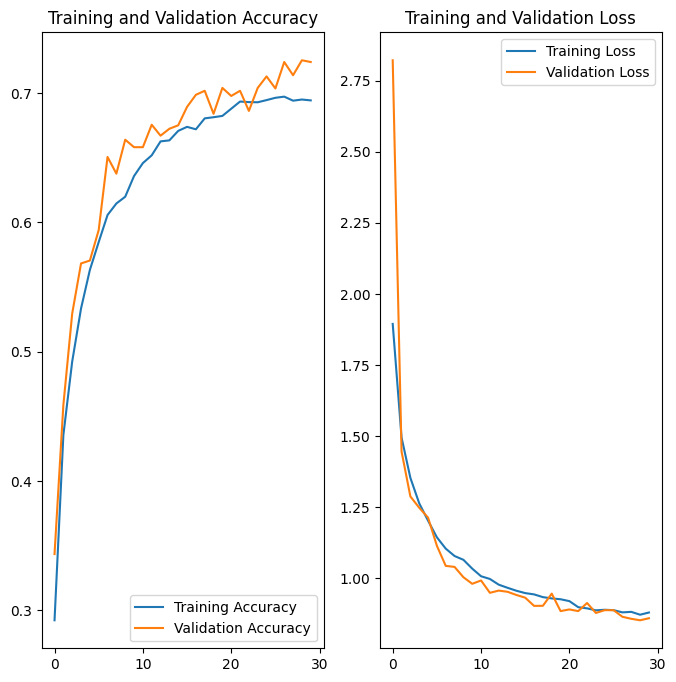

In [72]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(30)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Insight

- Model accuracy increases significatly in both train and valivalidation up to 70%
- Loss is decrease until less than 1

->> Underfitting and Overfitting issue is solved

- With the number of epoch is 30 we cann't increase performance over 80% so we should generate more images and increase number of epoch

## Cleanup Rebalance Output

In [ ]:
reblance_dirs = [x for x in data_dir_train.glob(os.path.join( '*','output'))]
reblance_dirs
import os, shutil

for dir in reblance_dirs:
    shutil.rmtree(dir)
    print(f"Deleted {dir}")

Deleted data/Train/melanoma/output
Deleted data/Train/pigmented benign keratosis/output
Deleted data/Train/nevus/output
Deleted data/Train/basal cell carcinoma/output
Deleted data/Train/actinic keratosis/output
Deleted data/Train/squamous cell carcinoma/output
Deleted data/Train/vascular lesion/output
Deleted data/Train/seborrheic keratosis/output
Deleted data/Train/dermatofibroma/output
